In [31]:
# base imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#magic commands
%matplotlib inline
warnings.filterwarnings('ignore')

#model selection
from sklearn.model_selection import train_test_split

#model and other imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
data = pd.read_table('./data/SMSSpamCollection' , sep='\t' , header=None , names=['label', 'sms_message'])

In [7]:
data.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


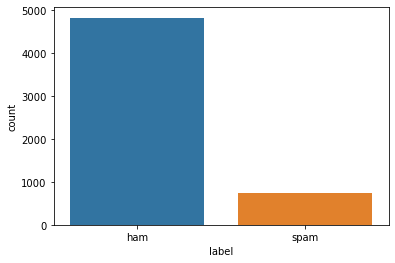

In [12]:
#frequency distributions of ham and spam messages
sns.countplot(data.label);

In [21]:
#changing the unique labels into an instance of zeros and ones

data['label'] = data['label'].map({'ham':0 , 'spam':1})

In [22]:
X , y = data['sms_message'] , data['label']

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=1)

Transforming the data using the countvectorizer method to selectively create a counter for each word constitiuting the dataset and fitting the instance to both the training and testing data

In [24]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [34]:
#Finding the number of distinct words present in the dataset 
len(count_vector.get_feature_names())

7456

In [25]:
training_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
classifier = MultinomialNB()

classifier.fit(training_data , y_train)

MultinomialNB()

In [30]:
predictions = classifier.predict(testing_data)

In [32]:
#evaluating results metrics

print('Accuracy score: ', format(accuracy_score(predictions , y_test)))
print('Precision score: ', format(precision_score(predictions , y_test)))
print('Recall score: ', format(recall_score(predictions , y_test)))
print('F1 score: ', format(f1_score(predictions , y_test)))

Accuracy score:  0.9885139985642498
Precision score:  0.9405405405405406
Recall score:  0.9720670391061452
F1 score:  0.9560439560439562


This represents the base accuracy metric for the naivebayes classifier and this does pretty well.